In [127]:
import sympy as sp
import numpy as np

sp.init_printing()

In [91]:
xi, L, A, E = sp.symbols("xi L A E")
Nue = sp.Matrix([(1-xi)/2, (1+xi)/2])
Nue

⎡  ξ   1⎤
⎢- ─ + ─⎥
⎢  2   2⎥
⎢       ⎥
⎢ ξ   1 ⎥
⎢ ─ + ─ ⎥
⎣ 2   2 ⎦

In [92]:
Bue=sp.diff(Nue,xi)*2/L
Bue

⎡-1 ⎤
⎢───⎥
⎢ L ⎥
⎢   ⎥
⎢ 1 ⎥
⎢ ─ ⎥
⎣ L ⎦

In [93]:
KeTRUSS1D = A*E*sp.integrate(Bue*(Bue.T),(xi,-1,1))*L/2
KeTRUSS1D

⎡ A⋅E   -A⋅E ⎤
⎢ ───   ─────⎥
⎢  L      L  ⎥
⎢            ⎥
⎢-A⋅E    A⋅E ⎥
⎢─────   ─── ⎥
⎣  L      L  ⎦

In [94]:
def KeTRUSS1D(A,E,L):
    return np.multiply(A*E/L, np.array([[1,-1],[-1,1]]))

In [95]:
KeTRUSS1D(1,1,1)

array([[ 1., -1.],
       [-1.,  1.]])

# Adatok

In [96]:
A1=60
A2=20
A3=30
E1=100e3
E2=200e3
E3=50e3
L1=1e3
L2=2e3
L3=3e3
FT=15e3

In [97]:
en=np.array([
    [1,2],
    [2,3],
    [2,4]])

In [98]:
Ke1 = KeTRUSS1D(A1,E1,L1)
Ke2 = KeTRUSS1D(A2,E2,L2)
Ke3 = KeTRUSS1D(A3,E3,L3)

In [103]:
KG=np.zeros((4,4))
KG

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

Elem mátrixok elhelyezése a szerkezeti merevségi mátrixban
[np.ix_](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ix_.html)

In [105]:
elemSzam=1
KG[np.ix_(en[elemSzam-1]-1,en[elemSzam-1]-1)] += Ke1
KG

array([[ 6000., -6000.,     0.,     0.],
       [-6000.,  6000.,     0.,     0.],
       [    0.,     0.,     0.,     0.],
       [    0.,     0.,     0.,     0.]])

In [106]:
elemSzam=2
KG[np.ix_(en[elemSzam-1]-1,en[elemSzam-1]-1)] += Ke2
KG

array([[ 6000., -6000.,     0.,     0.],
       [-6000.,  8000., -2000.,     0.],
       [    0., -2000.,  2000.,     0.],
       [    0.,     0.,     0.,     0.]])

In [107]:
elemSzam=3
KG[np.ix_(en[elemSzam-1]-1,en[elemSzam-1]-1)] += Ke3
KG

array([[ 6000., -6000.,     0.,     0.],
       [-6000.,  8500., -2000.,  -500.],
       [    0., -2000.,  2000.,     0.],
       [    0.,  -500.,     0.,   500.]])

In [185]:
FG = np.array([0, 0, 0, 0])
FG[1 - 1] += FT

In [186]:
szabadDOF = [0,1]

In [187]:
KGkond = KG[np.ix_(szabadDOF,szabadDOF)]
KGkond

array([[ 6000., -6000.],
       [-6000.,  8500.]])

In [188]:
FGkond = FG[np.ix_(szabadDOF)]
FGkond

array([15000,     0])

In [190]:
# a lineáris egyenletrendszer alulhatározott
np.linalg.solve(KG,FG)

LinAlgError: Singular matrix

In [121]:
Umego = np.linalg.solve(KGkond,FGkond)
Umego

array([8.5, 6. ])

In [182]:
UG = np.zeros(4)
UG[np.ix_(szabadDOF)] += Umego
UG

array([8.5, 6. , 0. , 0. ])

In [183]:
np.dot(KG,UG)

array([ 15000.,      0., -12000.,  -3000.])

Eredmények megjelenítése

In [128]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

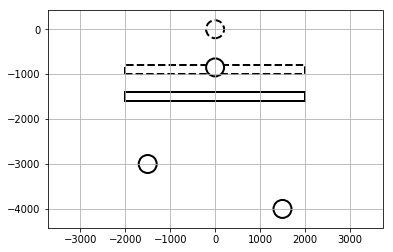

In [179]:
nagy = 100
plt.figure()
ax = plt.gca()

ax.add_patch(mpatches.Circle((0,0),200, fc = (1,1,1,1),ec = (0,0,0,1),ls = "--", lw = 2))
ax.add_patch(mpatches.Rectangle((-2*L1,-L1),4*L1,200, fc = (1,1,1,1),ec = (0,0,0,1),ls = "--", lw = 2))
ax.add_patch(mpatches.Circle((-1.5*L1,-L1-L2),200, fc = (1,1,1,1),ec = (0,0,0,1), lw = 2))
ax.add_patch(mpatches.Circle((1.5*L1,-L1-L3),200, fc = (1,1,1,1),ec = (0,0,0,1), lw = 2))

ax.add_patch(mpatches.Circle((0,0-nagy*U[0]),200, fc = (1,1,1,1),ec = (0,0,0,1), lw = 2))
ax.add_patch(mpatches.Rectangle((-2*L1,-L1 - nagy*U[1]),4*L1,200, fc = (1,1,1,1),ec = (0,0,0,1), lw = 2))
plt.axis("equal")
plt.grid()
plt.show()